In [11]:
import dynamics_analysis as da
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

%load_ext autoreload
%autoreload 2 
plt.rcParams["figure.figsize"] = (4.5,3.5)
plt.rc('legend', fontsize = 10)
plt.rcParams["legend.framealpha"] = 1

keynote_folder_path='/Users/nicolas/Library/Mobile Documents/com~apple~Keynote/Documents/YIF_annual_meeting/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decay rate calibration


In [15]:
path = '../../data_mac/data_5304_25_03_2024/'
paramchar_cav1= "nl2_n1_1_E0.15E-01_dtadd0.10_0.10_4_ar0.0_g0.000_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv1.0_tmax40_TRSM3"
dyn_cav1 = da.dynamics(2,path, paramchar_cav1)
paramchar_cav1_LONG= "nl2_n1_1_E0.15E-01_dtadd0.10_0.10_4_ar0.0_g0.000_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.0000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv1.0_tmax120_TRSM3"
dyn_cav1_LONG = da.dynamics(2,path, paramchar_cav1_LONG)

dyns={}
paramchar= "nl2_n1_1_E0.15E-01_dtadd0.10_0.10_4_ar0.0_g0.250_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.1000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns[1] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_2_E0.15E-01_dtadd0.10_0.10_4_ar0.0_g0.250_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.1000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns[2] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_10_E0.15E-01_dtadd0.10_0.10_4_ar0.0_g0.250_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.1000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns[10] = da.dynamics(2,path, paramchar)
paramchar= "nl2_n2_30_E0.50E-02_dtadd0.20_0.20_4_ar0.0_g0.250_gam0.051487_nm250_p0.5E-05_wq5.3037_wc7.500_bc2.300_5.200_7.500_12.600_bw3.000_mr0.00_0.50_0.00_wd7.500_ad0.1000_anh159.155_dt0.0050_errl0.1E-03_lsfe14_qb2_cv0.0_tmax40_TRSM3"
dyns[30] = da.dynamics(2,path, paramchar)


-- fitted decay rate/(2*np.pi) = 0.10120368666703036 GHz


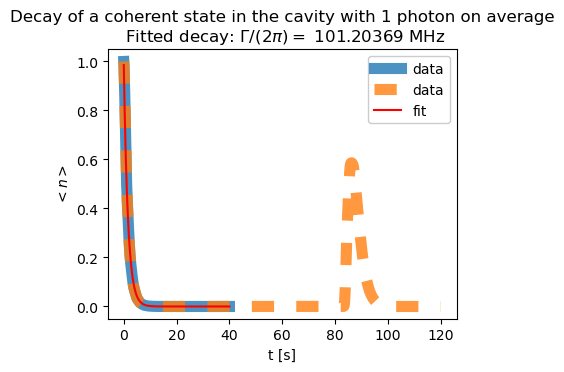

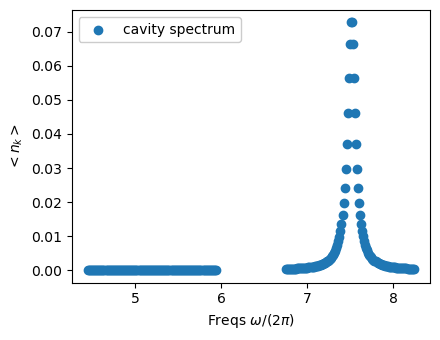

In [16]:
from scipy.optimize import curve_fit

def exp_decay(t,gamma):
    return np.exp( -gamma*t )

opt, _ = curve_fit( exp_decay, dyn_cav1.times, dyn_cav1.nk[:,0] )
Gamma=opt[0]

print( '-- fitted decay rate/(2*np.pi) =', Gamma/(2*np.pi), "GHz" )

plt.plot( dyn_cav1.times[1:], dyn_cav1.nk[1:,0], linewidth=8, alpha=0.8,label='data'  )
plt.plot( dyn_cav1_LONG.times[1:], dyn_cav1_LONG.nk[1:,0], linewidth=8, dashes=[2,2,2,2],alpha=0.8,label='data'  )
plt.plot( dyn_cav1.times[1:], exp_decay( dyn_cav1.times[1:], opt[0]), c='red', label='fit'  )
plt.ylabel( "$<n>$" )
plt.xlabel('t [s]')
plt.title('Decay of a coherent state in the cavity with 1 photon on average\n Fitted decay: $\Gamma/(2\pi)=$ '+str(np.round(1e3*Gamma/(2*np.pi),5))+' MHz')
plt.legend()
plt.show()


plt.scatter( dyn_cav1_LONG.wk[:]/(2*np.pi), dyn_cav1_LONG.nk[-1,1:], label='cavity spectrum'  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()

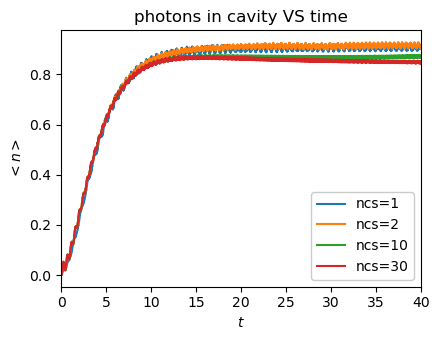

In [17]:
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].nk[:,0], label='ncs='+str(n)  )  
plt.xlim(0,40)
#plt.ylim(0,0.3)
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_convergence.pdf',format='pdf' )
plt.show()

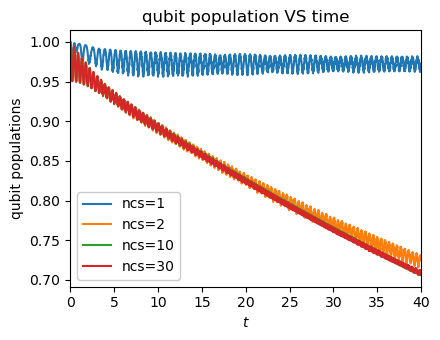

In [18]:
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].pplt[:,1], label='ncs='+str(n)  )
plt.xlim(0,40)
plt.ylabel( "qubit populations" )
plt.xlabel( "$t$" )
plt.title( "qubit population VS time"  )
#plt.plot( times_me, pplt_me[:,2], label='master equation',c='black', alpha=0.3  )  
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'qubit_excited_population.pdf',format='pdf' )
plt.show()

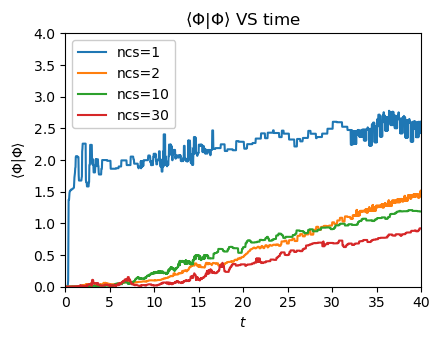

In [20]:
for n in dyns:
    plt.plot( dyns[n].times, dyns[n].error, label='ncs='+str(n)  )
plt.ylim(0,4)
plt.xlim(0,40)
plt.ylabel( r"$\langle \Phi | \Phi \rangle$" )
plt.xlabel( "$t$" )
plt.title( r"$\langle \Phi | \Phi \rangle$ VS time"  )
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig( keynote_folder_path+'error_convergence.pdf',format='pdf' )
plt.show()

## CAVITY PHOTON NUMBER and ERROR versus time

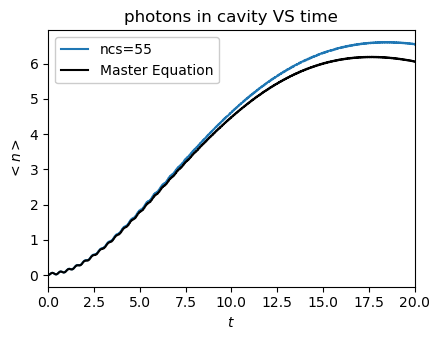

In [7]:
for n in [55]:
    plt.plot( dyns[n].times, dyns[n].nk[:,0], label='ncs='+str(n)  )
    
plt.plot( times_me, photons_me, label='Master Equation',c='black'  )    
plt.xlim(0,20)
#plt.plot( times_me2, photons_me2, label='ME',c='black', dashes=[2,2,2,2]  )
plt.ylabel( "$<n>$" )
plt.xlabel( "$t$" )
plt.title( "photons in cavity VS time"  )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'photons_comparison_with_master_equation.pdf',format='pdf' )
plt.show()

## **Bath photon spectrum**

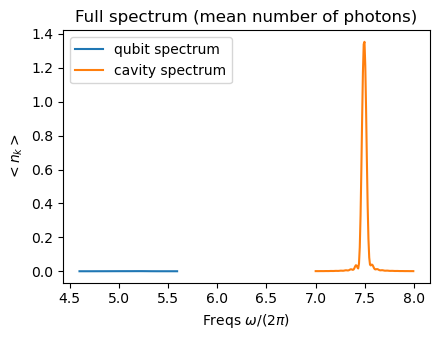

In [86]:
for n in [40]:
    plt.plot( dyns[n].wk[:125]/(2*np.pi), dyns[n].nk[-1,1:126], label='qubit spectrum'  )
    plt.plot( dyns[n].wk[125:]/(2*np.pi), dyns[n].nk[-1,126:], label='cavity spectrum'  )

#plt.xlim(4.5,5.7)
#plt.ylim(0,0.01)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'spectrum_full.pdf',format='pdf' )
plt.show()

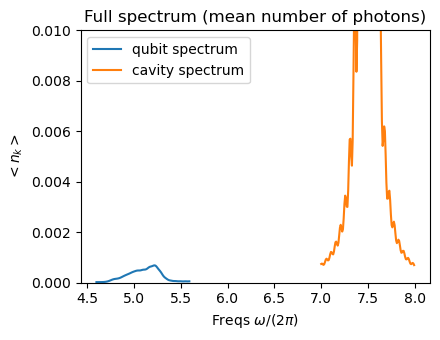

In [87]:
for n in [40]:
    plt.plot( dyns[n].wk[:125]/(2*np.pi), dyns[n].nk[-1,1:126], label='qubit spectrum'  )
    plt.plot( dyns[n].wk[125:]/(2*np.pi), dyns[n].nk[-1,126:], label='cavity spectrum'  )

#plt.xlim(4.5,5.7)
plt.ylim(0,0.01)
plt.title( "Full spectrum (mean number of photons)"  )
plt.xlabel( "Freqs $\omega/(2\pi)$"  )
plt.ylabel( "$<n_k>$" )
plt.legend()
plt.tight_layout()
plt.savefig( keynote_folder_path+'spectrum_zoomed_in.pdf',format='pdf' )
plt.show()

# **Wigner function of the final state**

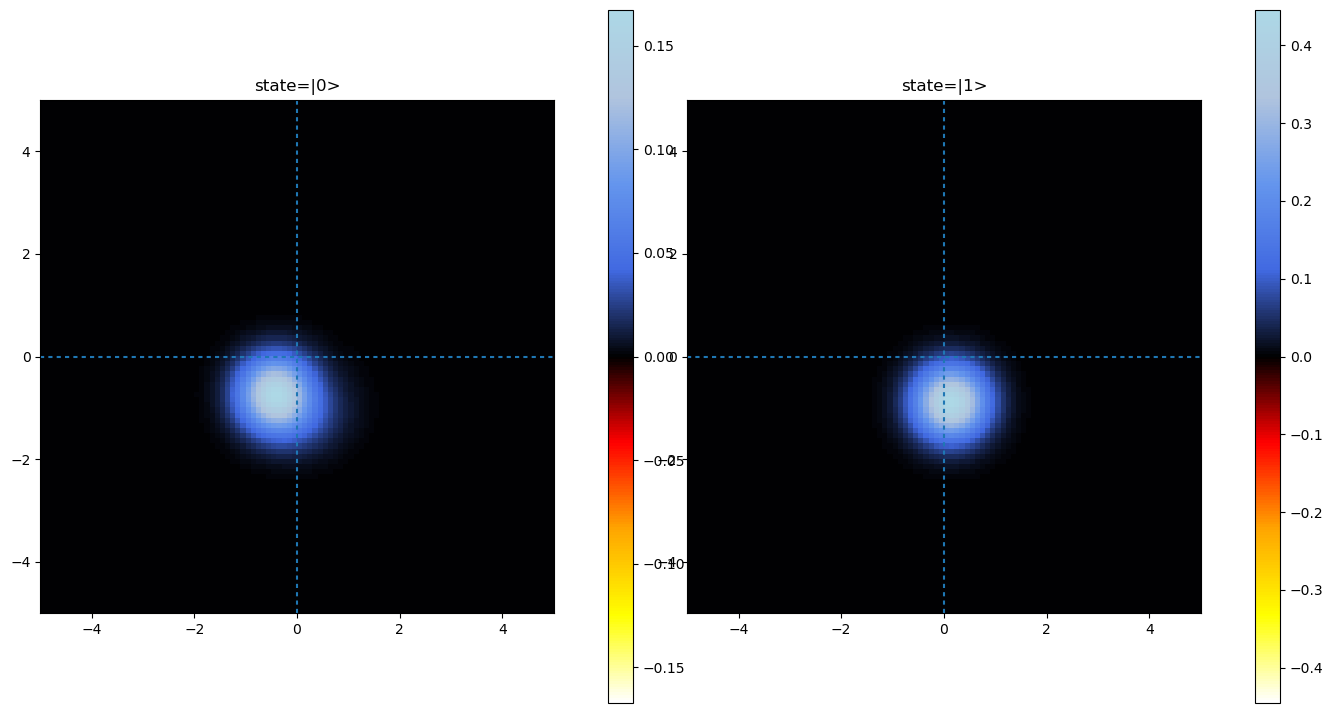

In [22]:
dyns[30].final_state.plot_split_wigners(xmin=-5)

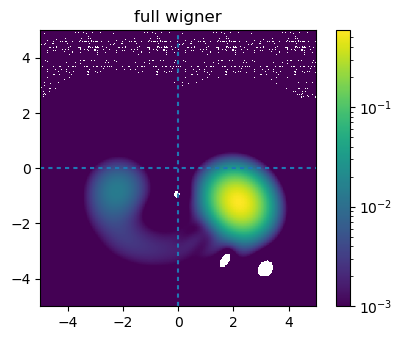

In [90]:
dyns[40].plot_wigner(xmin=-5 , log_min=0.001,add_cs_centers=False, \
                     path=keynote_folder_path, label="wigner_with_no_centers.pdf")

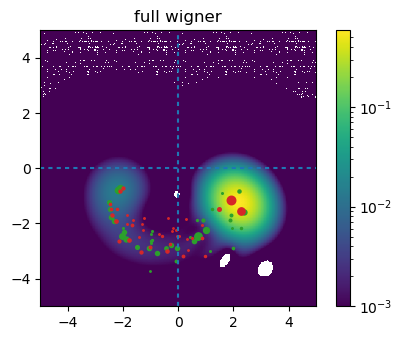

In [91]:
dyns[40].plot_wigner(xmin=-5 , log_min=0.001,add_cs_centers=True, \
                     path=keynote_folder_path, label="wigner_with_centers.pdf")